In [1]:
import os

# List all files in the data folder
print(os.listdir('../data'))


['.ipynb_checkpoints', 'NUSW-NB15GT.csv', 'NUSW-NB15_features.csv', 'sample.csv', 'UNSW-NB15_1.csv', 'UNSW-NB15_2.csv', 'UNSW-NB15_3.csv', 'UNSW-NB15_4.csv']


# UNSW-NB15 Anomaly Detection 

In [19]:
# 📌 Cell 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns in DataFrame
pd.set_option('display.max_columns', None)



In [20]:
print(df.columns)
print(gt.columns)

Index(['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055',
       '132', '164', '31',
       ...
       '456.043567', '15.530109', '1424250009', '1424250009.1', '3.943843',
       '4.912488', '0.00059', '0.000473', '0.000117', '4'],
      dtype='object', length=139)
Index(['Start time', 'Last time', 'Attack category', 'Attack subcategory',
       'Protocol', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Attack Name', 'Attack Reference', '.'],
      dtype='object')


In [21]:
print([col for col in df.columns if 'label' in col.lower() or 'attack' in col.lower()])

[]


In [22]:
# 📌 Cell 3: Load and Merge UNSW-NB15 Dataset(no label merge)
data_dir = "../data"
data_parts = [f"{data_dir}/UNSW-NB15_{i}.csv" for i in range(1, 5)]

parts = [pd.read_csv(part, low_memory=False) for part in data_parts]
df = pd.concat(parts, ignore_index=True)

print("Dataset shape:", df.shape)
print("Columns sample:", df.columns[:10])
print(df.head())

Dataset shape: (2540043, 139)
Columns sample: Index(['59.166.0.0', '1390', '149.171.126.6', '53', 'udp', 'CON', '0.001055',
       '132', '164', '31'],
      dtype='object')
   59.166.0.0   1390  149.171.126.6    53  udp  CON  0.001055    132    164  \
0  59.166.0.0  33661  149.171.126.9  1024  udp  CON  0.036133  528.0  304.0   
1  59.166.0.6   1464  149.171.126.7    53  udp  CON  0.001119  146.0  178.0   
2  59.166.0.5   3593  149.171.126.5    53  udp  CON  0.001209  132.0  164.0   
3  59.166.0.3  49664  149.171.126.0    53  udp  CON  0.001169  146.0  178.0   
4  59.166.0.0  32119  149.171.126.9   111  udp  CON  0.078339  568.0  312.0   

   31  29  0  0.1  dns   500473.9375   621800.9375  2  2.1  0.2  0.3  0.4  \
0  31  29  0    0    -   87676.08594   50480.17188  4  4.0    0    0  0.0   
1  31  29  0    0  dns  521894.53130  636282.37500  2  2.0    0    0  0.0   
2  31  29  0    0  dns  436724.56250  542597.18750  2  2.0    0    0  0.0   
3  31  29  0    0  dns  499572.25000  60906

In [23]:
# 📌 Cell 4: Preprocessing
# Drop any ID or timestamp columns if present (adjust according to your df)
drop_cols = []  # e.g. ['id', 'timestamp'] if exist

X = df.drop(columns=drop_cols, errors='ignore')

# Encode categorical columns
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing values
X = X.fillna(0)

print("Features after preprocessing:", X.shape)


Features after preprocessing: (2540043, 139)


In [25]:
# 📌 Cell 5: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# 📌 Cell 6:Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42, n_jobs=-1)
iso_forest.fit(X_scaled)

# Predict anomalies: -1 = anomaly, 1 = normal
anomaly_labels = iso_forest.predict(X_scaled)

# Add prediction to original dataframe
df['anomaly'] = anomaly_labels
print("Anomaly label counts:")
print(df['anomaly'].value_counts())


Anomaly label counts:
anomaly
 1    2286038
-1     254005
Name: count, dtype: int64


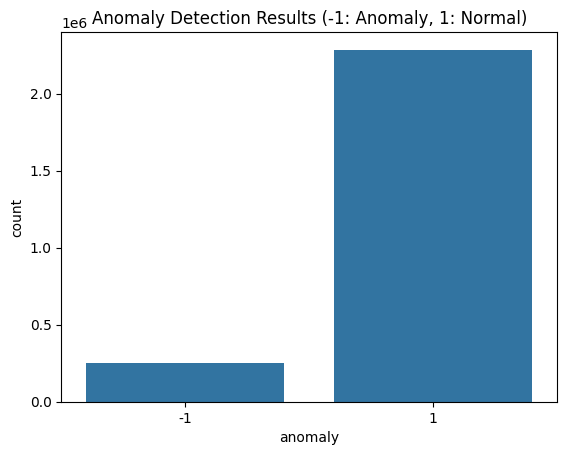

In [27]:
# 📌 Cell 7: Visualize Anomalies (Optional)
sns.countplot(x='anomaly', data=df)
plt.title('Anomaly Detection Results (-1: Anomaly, 1: Normal)')
plt.show()

In [28]:
# 📌 Cell 9: Save Model and Scaler
import joblib

# Save the Isolation Forest model
joblib.dump(iso_forest, 'isolation_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully.")

✅ Model and scaler saved successfully.
